### Problem Statement
- ### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience


# Data Preprocessing 

In [83]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from joblib import dump
%matplotlib inline

In [84]:
df=pd.read_csv("Admission_Prediction.csv")  # importing the data set

In [85]:
df.drop('Serial No.', axis=1, inplace=True)
df.drop('SOP', axis=1, inplace=True)
df.drop('LOR', axis=1, inplace=True)


In [86]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [87]:
df_university = df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
University Rating,,,,,
4.3,316.857143,105.857143,8.434286,0.714286,0.428571
15.0,317.000000,110.000000,8.880000,0.000000,0.000000
16.0,317.000000,110.000000,8.880000,0.000000,0.000000
17.5,317.833333,104.833333,8.973333,0.666667,0.500000
20.0,317.000000,110.000000,8.880000,0.000000,1.000000
29.9,314.692308,95.538462,8.346154,0.461538,0.461538
36.6,316.000000,107.833333,7.683333,0.333333,0.500000
38.4,306.285714,99.571429,6.808571,0.428571,0.285714
39.6,307.750000,103.750000,8.490000,0.500000,0.750000


In [88]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [89]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,CGPA,Research
0,317,110,47.0,8.88,0
1,317,110,16.0,8.88,0
2,317,110,4.3,8.88,0
3,317,110,20.0,8.88,0
4,317,110,15.0,8.88,0


In [90]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(130, 1)

In [91]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
scaled_data

array([[ 3.50595114e-01,  6.56243559e-01, -1.47630258e-01,
         1.09068288e+00, -9.84731928e-01],
       [ 3.50595114e-01,  6.56243559e-01, -1.60476947e+00,
         1.09068288e+00, -9.84731928e-01],
       [ 3.50595114e-01,  6.56243559e-01, -2.15472202e+00,
         1.09068288e+00, -9.84731928e-01],
       [ 3.50595114e-01,  6.56243559e-01, -1.41675151e+00,
         1.09068288e+00, -9.84731928e-01],
       [ 3.50595114e-01,  6.56243559e-01, -1.65177396e+00,
         1.09068288e+00, -9.84731928e-01],
       [-9.11887131e-02, -5.24086900e-01,  2.29660326e+00,
        -1.91521827e+00, -9.84731928e-01],
       [-1.46411692e-01, -6.55234729e-01,  1.51162827e+00,
        -3.49644752e-01, -9.84731928e-01],
       [ 1.92572438e-02, -6.55234729e-01,  1.51162827e+00,
         5.89699359e-01, -9.84731928e-01],
       [-2.01634670e-01, -1.24539996e+00,  1.51162827e+00,
        -3.65300488e-02, -9.84731928e-01],
       [ 5.53079369e-01,  6.56243559e-01,  6.32644289e-01,
        -7.82786759e-02

In [92]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [93]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [94]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-0.7868583905683451

                   coefficient
GRE Score             0.004019
TOEFL Score           0.016411
University Rating     0.018374
CGPA                  0.555673
Research              0.501356
Feature: 0, Score: 0.00402
Feature: 1, Score: 0.01641
Feature: 2, Score: 0.01837
Feature: 3, Score: 0.55567
Feature: 4, Score: 0.50136


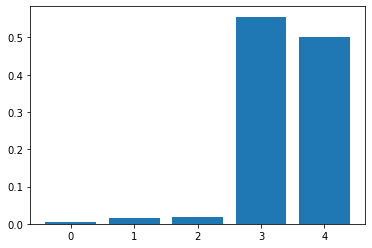

In [95]:
intercept = reg.intercept_
dfx = df.drop('Chance of Admit' , axis=1)
importance = reg.coef_[0]
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [96]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)
# finding mi c1 , m2 c2,..... 

In [97]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [98]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-1.3061374667932135

# ANN Model

In [99]:
import tensorflow as tf
from tensorflow import keras
#tf.keras.layers.Dense
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
#opt = keras.optimizers.Adam(learning_rate=0.01)


In [100]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 5))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                300       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [101]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [102]:
epochs_hist = ANN_model.fit(train_x, train_y, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
5/5 [==============================] - 0s 24ms/step - loss: 1750.2340 - val_loss: 5.8305
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 1630.5289 - val_loss: 37.0596
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1169.6068 - val_loss: 16.0213
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 513.9368 - val_loss: 15.5094
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 366.6048 - val_loss: 5.1717
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 270.6135 - val_loss: 3.9914
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 220.4196 - val_loss: 2.7003
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 196.9081 - val_loss: 2.8743
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 181.0622 - val_loss: 2.7795
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 109.4225 - val_loss: 1.6123
Ep

In [103]:
result = ANN_model.evaluate(test_x, test_y)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1/1 [==============================] - 0s 16ms/step - loss: 0.9522
Accuracy : 0.04775357246398926


In [104]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

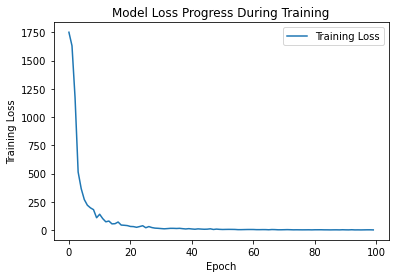

In [105]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# Decesion Tree Model

In [106]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.


from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(train_x, train_y)

DecisionTreeRegressor()

                   coefficient
GRE Score             0.332001
TOEFL Score           0.037783
University Rating     0.296915
CGPA                  0.231926
Research              0.101375
Feature: 0, Score: 0.33200
Feature: 1, Score: 0.03778
Feature: 2, Score: 0.29691
Feature: 3, Score: 0.23193
Feature: 4, Score: 0.10138


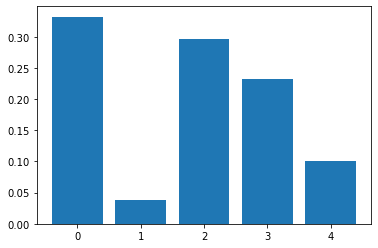

In [107]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = decisionTree_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [108]:
accuracy_decisionTree = decisionTree_model.score(test_x, test_y)
accuracy_decisionTree

0.05454545454545445

# Random Forrest Model

In [109]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(train_x, train_y)
accuracy_randomforest = randomForest_model.score(test_x, test_y)
accuracy_randomforest

C:\Users\mrhus\AppData\Local\Temp/ipykernel_16464/2085754441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(train_x, train_y)


0.4085236363636361

                   coefficient
GRE Score             0.339245
TOEFL Score           0.127996
University Rating     0.223136
CGPA                  0.256137
Research              0.053487
Feature: 0, Score: 0.33924
Feature: 1, Score: 0.12800
Feature: 2, Score: 0.22314
Feature: 3, Score: 0.25614
Feature: 4, Score: 0.05349


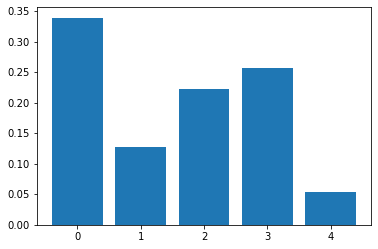

In [110]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = randomForest_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Saving the model to the local file system

In [111]:
#filename='finalized_model.pickle'
#pickle.dump(reg,open(filename,'wb'))
dump(randomForest_model, 'filename.joblib')

['filename.joblib']